## Deteccion para hipotesis binaria en canal AWGN
En un canal AWGN, se asume que el ruido que afecta la senial transmitida es aditivo, lo que significa que se suma a la senial original en el proceso de transmision. Se supone que el ruido es gaussiano lo que implica que sigue una distribucion normal con una media de cero y una varianza determinada. Ademas, se considera que el ruido es **blanco**, lo que significa que su densisdad espectral de potencia es constante en todas las frecuencias.
* Para simplificar se usara:
$$\sigma^2 = 1 $$
$$\mu = 0 $$
Y se va a ir variando la varianza para ver como cambia la grafica

Genero las muestras (10000 muestras) aleatoriamente con 0 o 1

Text(0, 0.5, '$Frequency$')

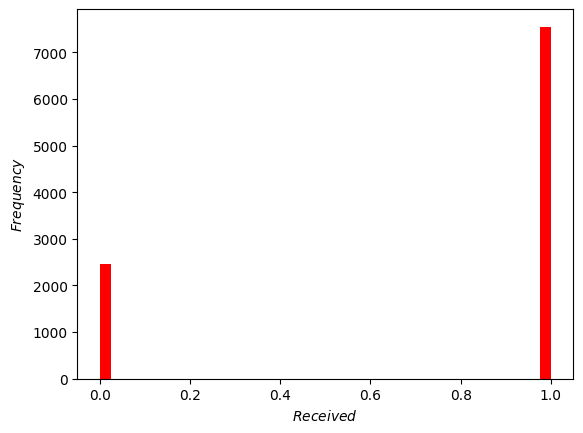

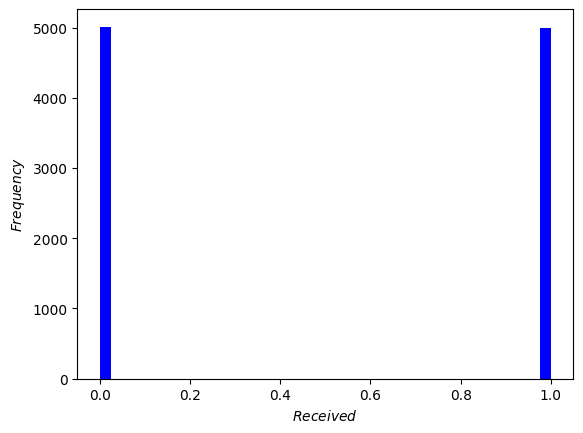

In [161]:
import numpy as np
import matplotlib.pyplot as plt

nbSamples = 10000
media = 0
var = 0.13
desvio = np.sqrt(var)
c0 = 0
c1 = 1

H0 = 0.25
H1 = 0.75

# Muestra no equiprobable
c = np.random.choice([0, 1], nbSamples, p = [H0, 1-H0])

# Muestra equiprobable
c2 = np.random.choice([0, 1], nbSamples, p = [0.50, 0.50])

plt.figure(0)
plt.hist(c, 40, color="red")
plt.xlabel('$Received$')
plt.ylabel('$Frequency$')

plt.figure(1)
plt.hist(c2, 40, color="blue")
plt.xlabel('$Received$')
plt.ylabel('$Frequency$')


#plt.hist(signalReceivedh1, 50, align="right")

En un canal AWGN se supone que el ruido es gaussiano, por lo tanto se generara una vector con distribucion Gaussiana

(array([0.00257221, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00257221, 0.00257221, 0.00771664, 0.00771664,
        0.00514443, 0.00771664, 0.02057771, 0.01543329, 0.036011  ,
        0.02829436, 0.06944979, 0.0540165 , 0.06944979, 0.08745528,
        0.10031636, 0.15947728, 0.18262721, 0.19548828, 0.21863821,
        0.27779914, 0.27779914, 0.3781155 , 0.36782664, 0.36525443,
        0.40898207, 0.44242085, 0.52987614, 0.51444285, 0.55302607,
        0.53759278, 0.50929842, 0.57617599, 0.61475921, 0.54273721,
        0.5581705 , 0.55302607, 0.51701507, 0.49900957, 0.50158178,
        0.468143  , 0.44756528, 0.41927092, 0.42184314, 0.40640985,
        0.41155428, 0.40898207, 0.4501375 , 0.46557078, 0.50158178,
        0.50158178, 0.46042635, 0.55559828, 0.504154  , 0.504154  ,
        0.51958728, 0.56331492, 0.60961478, 0.50158178, 0.53244835,
        0.5221595 , 0.43727642, 0.5221595 , 0.4861485 , 0.46299857,
        0.43727642, 0.39869321, 0.3060935 , 0.21

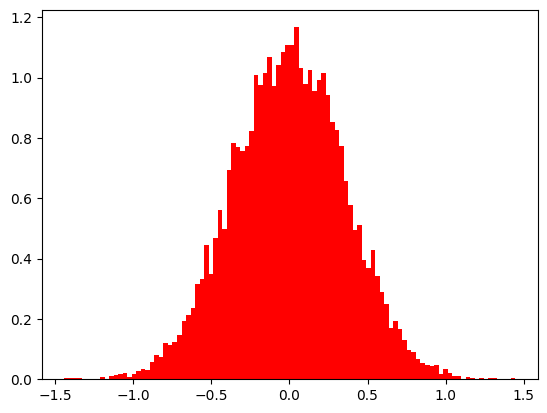

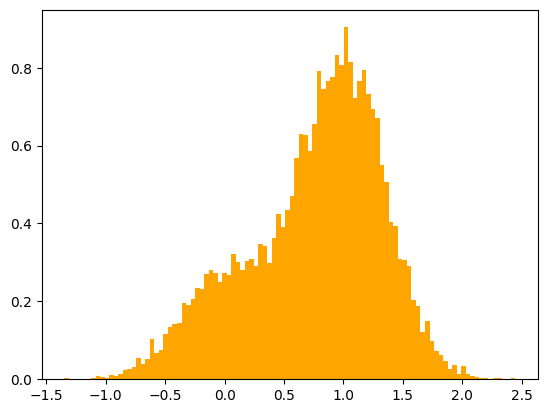

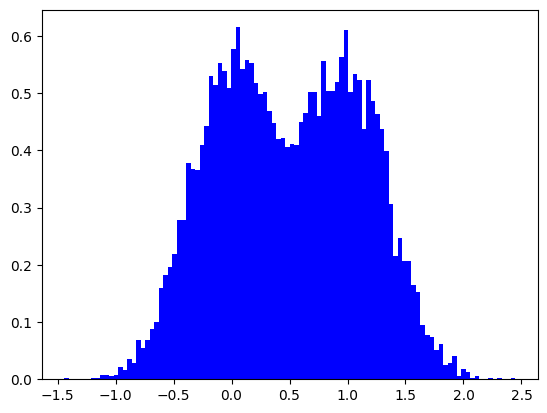

In [162]:
Z = np.random.normal(0, desvio, nbSamples)

Y = c + Z

Y2 = c2 + Z

#print(Z)
plt.figure(0)
plt.hist(Z, 100, density=True,color="red")

plt.figure(1)
plt.hist(Y, 100, density=True,color="orange")

plt.figure(2)
plt.hist(Y2, 100, density=True, color="blue")

La regla de decision $MAP$ y $ML$ decide en base a un nivel $Threshold$ si lo que detecto es un 0 o un 1 para este caso de hipotesis binaria
* Para MAP:
$$Threshold =\frac{Ln(\frac{p(h_0)}{p(h_1)})-\frac{C_0^2-C_1^2}{2\sigma^2}}{\frac{C_1-C_0}{\sigma^2}}$$
* Para ML:
$$Threshold =\frac{C_1^2-C_0^2}{2(C_1-C_0)}$$

(array([5030.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 4970.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

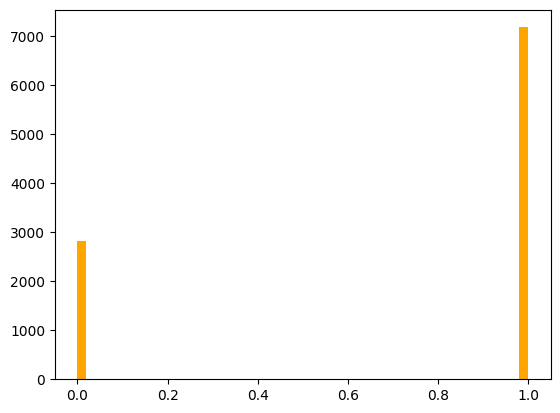

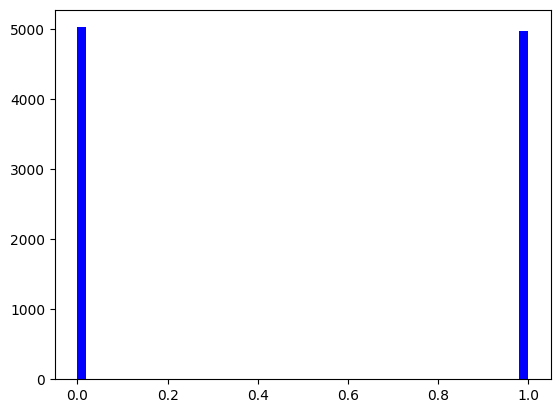

In [163]:
thresholdMAP = (np.log(H0/H1) - ((c0**2 - c1**2)/(2*var**2))) / ((c1 - c0)/(var**2))

thresholdML = ((c1**2 - c0**2) / (2*(c1 - c0)))
 
Yr = np.where(Y < thresholdMAP, 0, 1)

Yr2 = np.where(Y2 < thresholdML, 0, 1)

plt.figure(0)
plt.hist(Yr, 50, color="orange")

plt.figure(1)
plt.hist(Yr2, 50, color="blue")

Probabilidad de error para un canal AWGN

In [164]:
j = 0
error1 = 0
error2 = 0
for i in range(nbSamples):
    if(c[j] != Yr[j]):
        error1 = error1 + 1
    if(c2[j] != Yr2[j]):
        error2 = error2 + 1
    j = j + 1

print("Error en deteccion MAP: ", error1/nbSamples)
print("Error en deteccion ML: ", error2/nbSamples)

Error en deteccion MAP:  0.0763
Error en deteccion ML:  0.078


In [165]:
#Definicion de FUNCION Q
from scipy import special

def qfunc(x):
    return 0.5 - 0.5*special.erf(x/np.sqrt(2))


El BER se calcula con la siguente expresion:
$$P_e = P_H(0)Q(\frac{\theta-c_0}{\sigma})+P_H(1)Q(\frac{c_1-\theta}{\sigma})$$
En caso de que se H0 y H1 sean equiprobables la expresion se reduce a:
$$P_e = Q(\frac{d}{2\sigma})$$
Donde:
$$d = ||c_1 - c_0||$$

In [166]:
Q0 = qfunc((thresholdMAP - c0) / desvio)
Q1 = qfunc((c1 - thresholdMAP) / desvio)


PeMAP = (H0 * Q0) + (H1 * Q1)
PeML = qfunc((abs(c0 - c1) / (2*desvio) ))

print("Probabilidad de error en MAP: ",PeMAP, "\nProbabilidad de error en ML: ", PeML)



Probabilidad de error en MAP:  0.07911079045821036 
Probabilidad de error en ML:  0.08275892934873508


[0.94307685 0.9427145  0.94235034 0.94198436 0.94161656 0.94124692
 0.94087546 0.94050215 0.940127   0.93975    0.93937114 0.93899042
 0.93860784 0.93822338 0.93783705 0.93744884 0.93705874 0.93666674
 0.93627285 0.93587705 0.93547935 0.93507973 0.93467819 0.93427473
 0.93386934 0.93346202 0.93305276 0.93264155 0.93222839 0.93181328
 0.93139621 0.93097717 0.93055616 0.93013318 0.92970822 0.92928127
 0.92885234 0.92842141 0.92798848 0.92755354 0.92711659 0.92667763
 0.92623665 0.92579365 0.92534862 0.92490155 0.92445244 0.9240013
 0.9235481  0.92309285 0.92263554 0.92217617 0.92171473 0.92125122
 0.92078563 0.92031796 0.91984821 0.91937637 0.91890243 0.91842639
 0.91794825 0.917468   0.91698563 0.91650115 0.91601455 0.91552582
 0.91503496 0.91454196 0.91404683 0.91354955 0.91305013 0.91254855
 0.91204482 0.91153892 0.91103086 0.91052063 0.91000823 0.90949365
 0.90897689 0.90845795 0.90793681 0.90741349 0.90688796 0.90636023
 0.9058303  0.90529816 0.90476381 0.90422724 0.90368845 0.90314

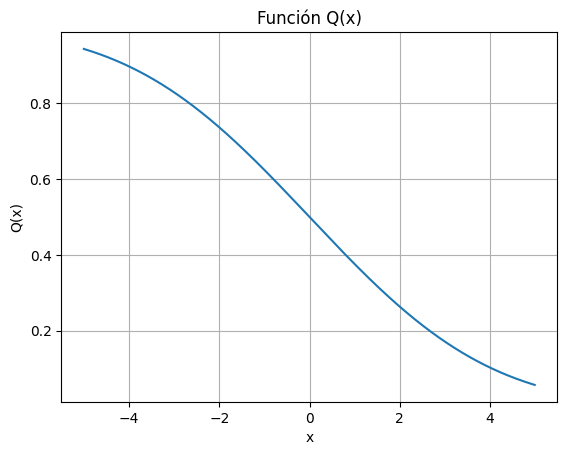

In [167]:


# Valores de x
x = np.arange(-5, 5, 0.01)

mu = 0
sigma2 = 10
sigma = np.sqrt(sigma2)

Q = np.zeros(1000, dtype=float)
for i in range(1000):
    Q[i] = qfunc((x[i]-mu)/sigma)
print(Q)


# Gráfico de Q(x)
plt.plot(x, Q)
plt.xlabel('x')
plt.ylabel('Q(x)')
plt.title('Función Q(x)')
plt.grid(True)
plt.show()


Calculo de la potencia de la señal

In [168]:
# Potencia de la señal
Ph = (sum(c**2))
Pruido = var * nbSamples

SNR = 10*np.log10(Ph/Pruido)
print("Potencia de la senial: ", Ph)
print("Potencia del ruido gaussiano: ", Pruido)
print("SNR: ", SNR, "dB")

Potencia de la senial:  7547
Potencia del ruido gaussiano:  1300.0
SNR:  7.638309976845613 dB


Text(0, 0.5, '$BER$')

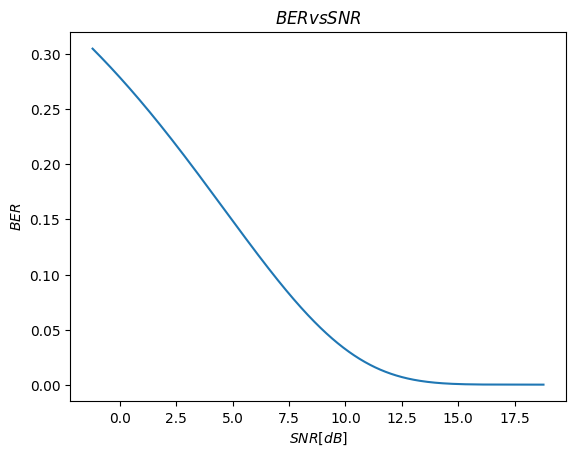

In [196]:
sigma = np.arange(0.1, 1, 0.001)

# SNR
Ph = np.zeros(len(sigma), dtype=float)
Pruido = np.zeros(len(sigma), dtype=float)
SNR = np.zeros(len(sigma), dtype = float)

for i in range(len(sigma)):
    Ph[i] = (sum(c**2))
    Pruido[i] = sigma[i]**2 * nbSamples
    SNR[i] = (Ph[i] / Pruido[i])


# BER
PeMAP = np.zeros(len(sigma), dtype=float)
PeML = np.zeros(len(sigma), dtype=float)
 
for i in range(len(sigma)):
    Q0 = qfunc((thresholdMAP - c0) / sigma[i])
    Q1 = qfunc((c1 - thresholdMAP) / sigma[i])
    PeMAP[i] = (H0 * Q0) + (H1 * Q1)
    PeML[i] = qfunc((abs(c0 - c1) / (2*sigma[i])))

plt.plot(10*np.log10(SNR) ,PeMAP)
plt.title('$BER vs SNR$')
plt.xlabel('$SNR[dB]$')
plt.ylabel('$BER$')